<ul><font size = 5 color='Orange'>
Learning Goals</font>
<font color = 'Orange'><li>Obtaining the Dataset</li>
<li>Describe the target value</li>
<li>Select is it classification or regression problem</li>
<li>Build basic model (KNN/Logistic Regression/Linear Regression) depending on the problem</li>
<li>Build Decision Tree model</li>
<li>Evaluate both models on the same test dataset</li>
<li>Compare the results</li>
</ul>

The Dataset for this exercise depends on your index number i.e number_of_data_set = index % 10:


0.  https://www.kaggle.com/tunguz/us-elections-dataset
1.  https://www.kaggle.com/andrewmvd/heart-failure-clinical-data
2.  https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019
3.  https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction
4.  https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
5.  https://www.kaggle.com/anmolkumar/house-price-prediction-challenge
6.  https://www.kaggle.com/datasets/tadhgfitzgerald/fifa-international-soccer-mens-ranking-1993now
7.  https://www.kaggle.com/arslanali4343/real-estate-dataset
8.  https://www.kaggle.com/terenceshin/covid19s-impact-on-airport-traffic
9.  https://www.kaggle.com/arslanali4343/top-personality-dataset







In [89]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# <font color = 'orange'> 1. Data Preparation

In [90]:
import pandas as pd

In [91]:
data = pd.read_csv('/content/drive/MyDrive/3fifa_ranking.csv')

In [92]:
data.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [94]:
data.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

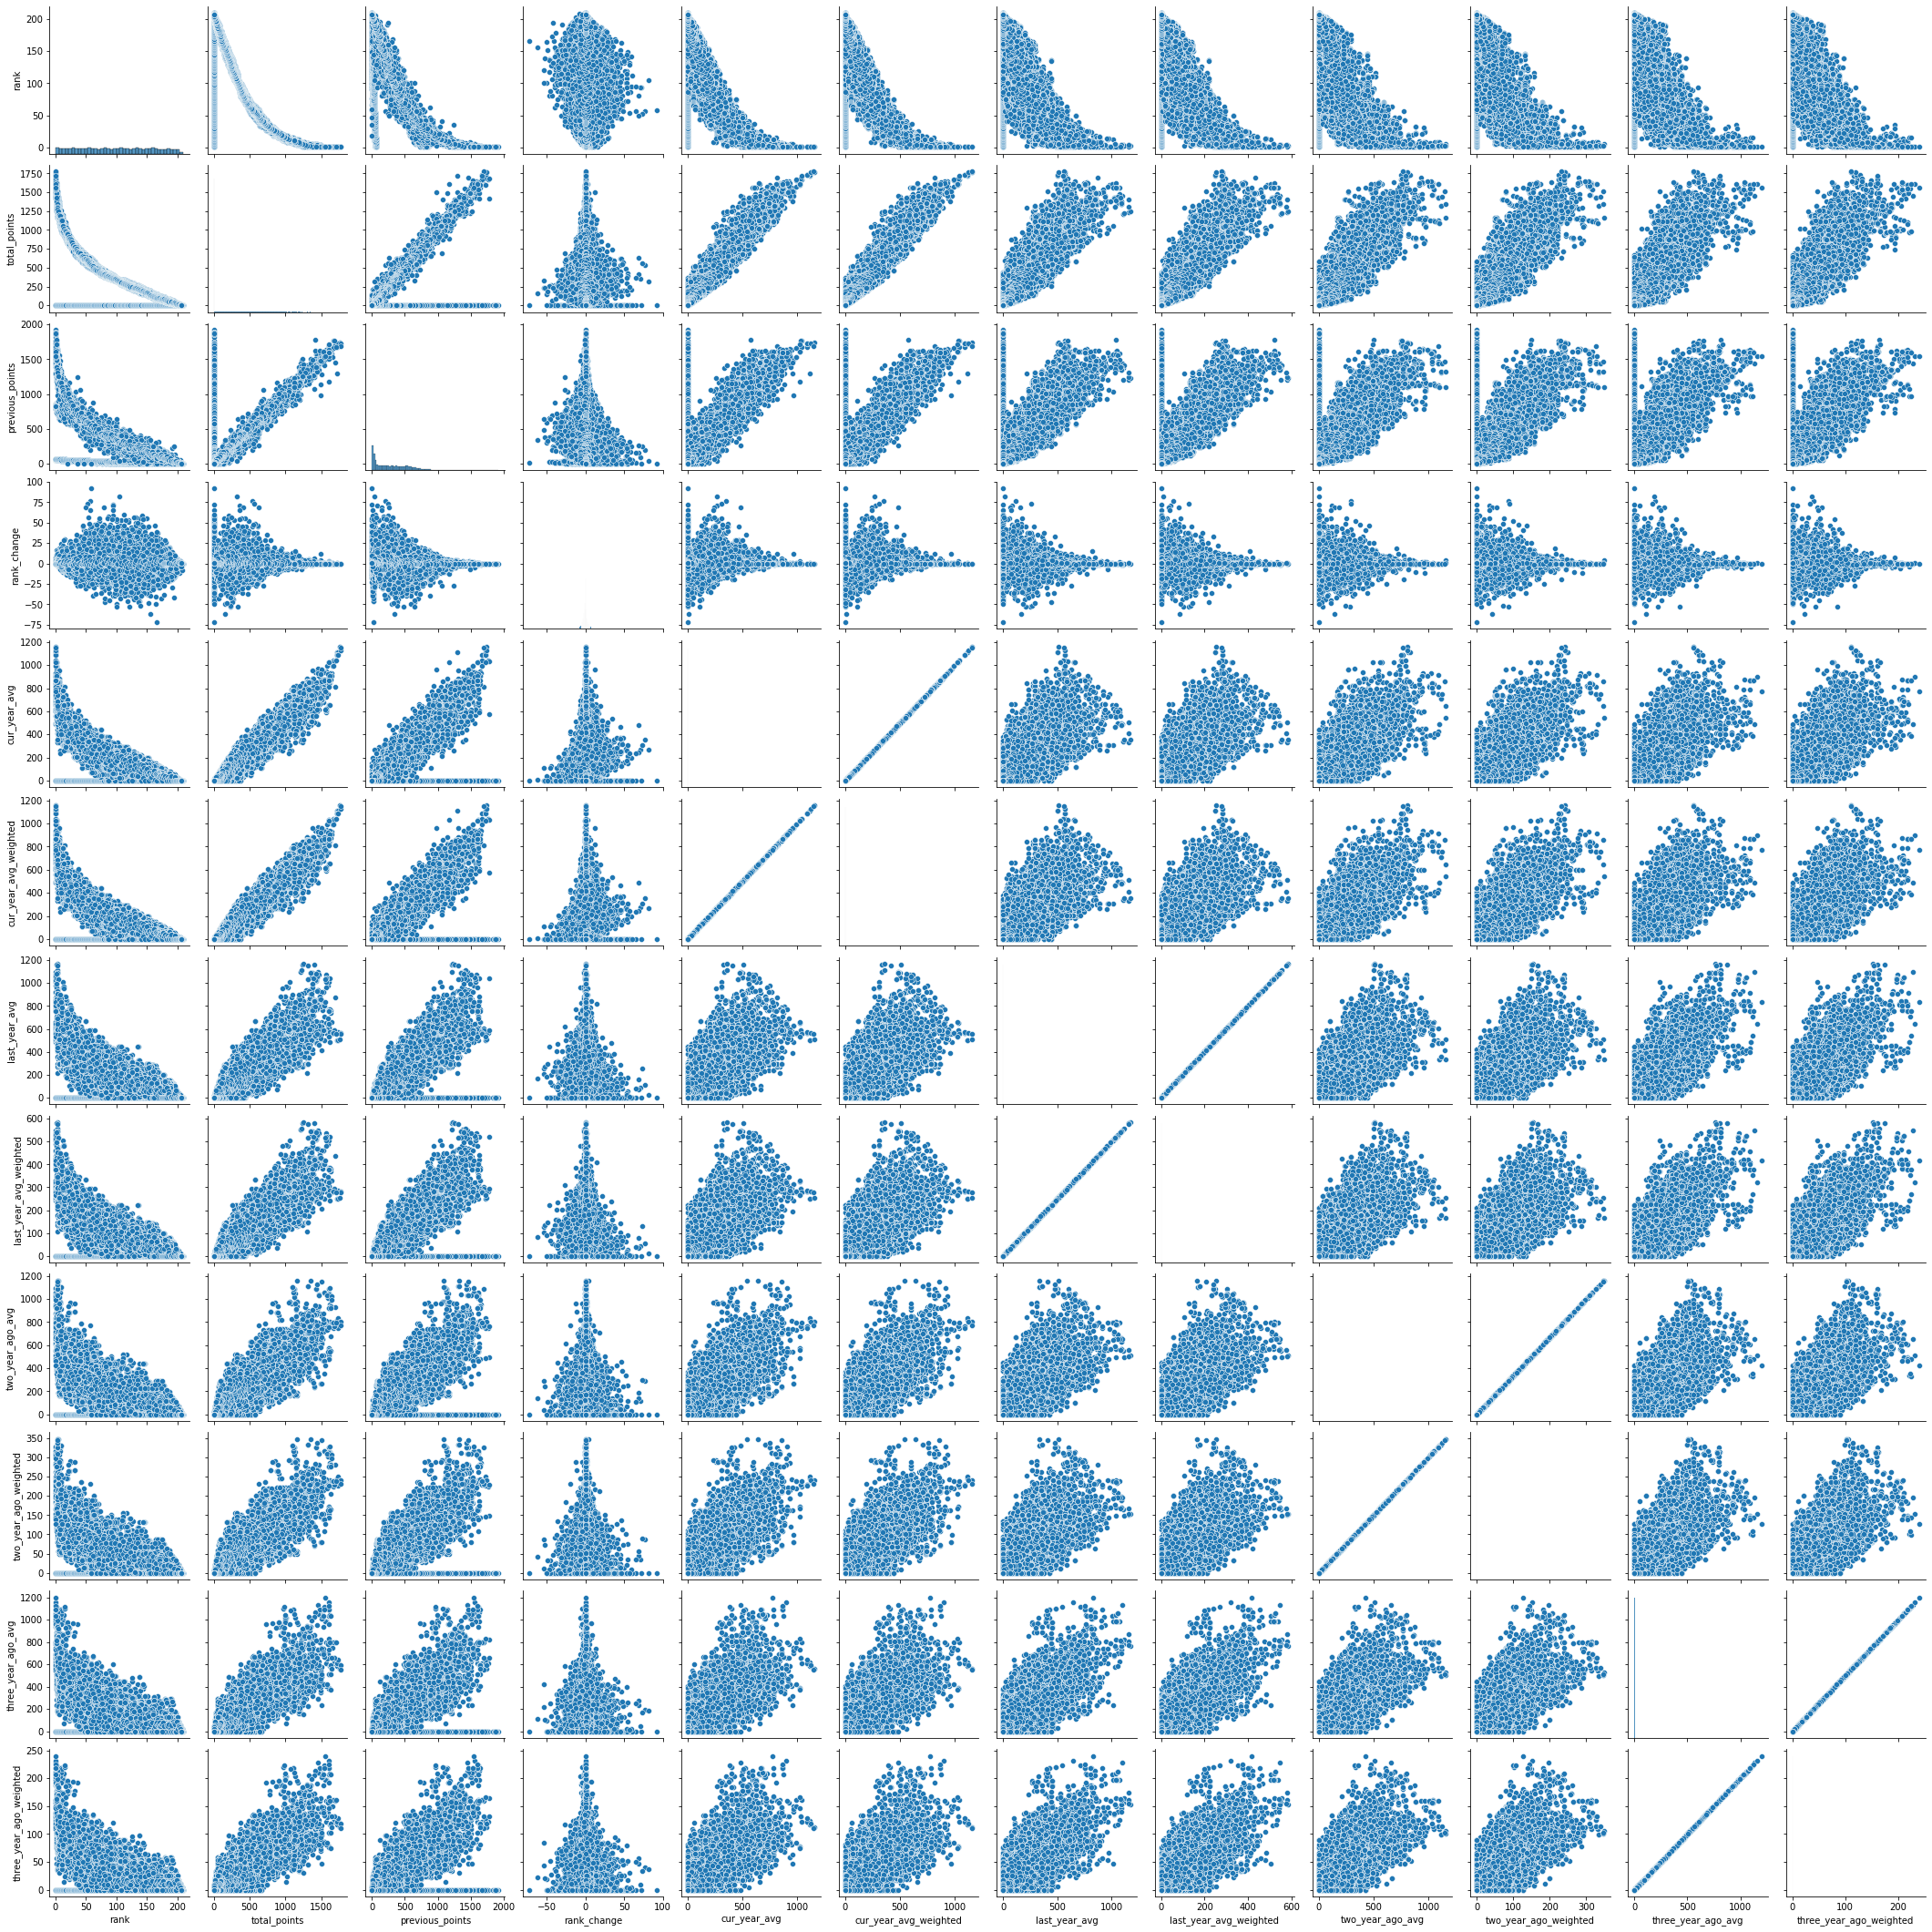

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data)

 <font color = 'orange'> • Choosing the important features and target column 


In [96]:
feature_cols = ['country_full', 'total_points', 'previous_points', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted', 
                'two_year_ago_avg','two_year_ago_weighted','three_year_ago_avg','three_year_ago_weighted']

X = data[feature_cols] 
print(X.shape)

(57793, 11)


In [97]:
feature_cols = ['rank']
Y = data[feature_cols]
print(Y.shape)

(57793, 1)


In [98]:
X

,country_full,total_points,previous_points,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
0,Germany,0.0,57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Italy,0.0,57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Switzerland,0.0,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Sweden,0.0,55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Argentina,0.0,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
57788,Anguilla,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57789,Bahamas,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57790,Eritrea,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57791,Somalia,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
Y

,rank
0,1
1,2
2,3
3,4
4,5
...,...
57788,206
57789,206
57790,206
57791,206


# <font color = 'orange'> 2. Describe the target value



> Target value is the `rank` column, which can be predicted with the help of the other columns in the dataset if we get a new observation of a country playing in the world cup.



# <font color = 'orange'> 3. Select if it's a classification or regression problem and build a basic model

> Regression problem therefore I'll be using a linear regression model.

 <font color = 'orange'> • Encoding the first column that has country names 


In [100]:
X_copy = X.copy()

In [101]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [102]:
X_copy['country_full'] = encoder.fit_transform(X_copy['country_full'])
X_copy['country_full']

0         75
1         95
2        185
3        184
4          8
        ... 
57788      6
57789     14
57790     64
57791    173
57792    194
Name: country_full, Length: 57793, dtype: int64

 <font color = 'orange'> • Splitting the dataset

In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_copy,  Y, test_size=0.2)

 <font color = 'orange'> • Normalization of data


In [104]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

 <font color = 'orange'> • Training the model

In [105]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, Y_train)

 <font color = 'orange'> • Evaluating the model

In [106]:
r_sq = model.score(X_train, Y_train)
print('Coefficient of determination:', r_sq)

Coefficient of determination: 0.5285023954417555


In [107]:
model.coef_

array([[-1.95814227e+00,  2.62396497e+00, -4.41833703e+01,
        -6.71673080e-01, -6.71673080e-01, -1.31651784e+04,
         1.31666096e+04, -1.16308083e+04,  1.16312903e+04,
        -7.24024280e+03,  7.24053451e+03]])

In [108]:
print('Intercept:', model.intercept_)

Intercept: [101.4396548]


In [109]:
Y_pred_lin = model.predict(X_test)
Y_pred_lin

array([[142.55004764],
       [ 69.13018647],
       [129.75639672],
       ...,
       [104.31195905],
       [136.90054248],
       [147.61591181]])

In [110]:
from sklearn.metrics import r2_score
     
r2_score(Y_test, Y_pred_lin)

0.539732271579555

# <font color = 'orange'> 4. Build Decision Tree model

In [111]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(X_train, Y_train)

y_pred = regressor.predict(X_test)

In [112]:
print("Accuracy:", regressor.score(X_test, Y_test))

Accuracy: 0.9636971823275644


# <font color = 'orange'> 5. Compare the results

> The decision tree regression model gave a significantly better result and accuracy than the linear regression model.